# Data Science Salary Analysis
Nesta Lacroix



**Introduction:**

The data science industry is undoubtedly rapidly evolving due to the widespread adoption of AI, which could have an effect on compensation for a widespread variety of data science jobs. It is likely that certain jobs within the industry, primarily those involving machine learning, will see increased demand and hence pay within the coming years. Such demand can be foreseen by exploring modern-day statstics of jobs in Data Science and looking for trends.

Specfically, to research this topic this project will import, filter, and anaylze the dataset 'Jobs and Salaries in Data Science' from 'kaggle.com'. The data includes 9,355 seperate entries of people employed in the Data Science Industry. Each entry has various information about the employee (with 12 total columns), but for the purposes of this exploration the data set will be filtered to only include only the top 5 job categories, salary amount in USD, and corresponding expreience level.

Using this filtered data, the anaylsis will be guided by two central questions:
1. How does salary vary across the top 5 most common job categories? 
2. Does experience level significantly influence salary?

*By Answering these questions, this project aims to indentify trends in compensation which could be used to predict future demand of jobs in Data Science.*

**Raw Data**: Imported from [Kaggle](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data/data) where is is publically maintained and availbable under a Open Database license.

In [1]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
# Load raw data set and info
df = pd.read_csv('jobs_in_data.csv')
print(f'-- Raw Data Info --')
print(df.info())

-- Raw Data Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB
None


The raw data information (from `df.info`) show 9355 entrees with no missing data. The data types can be worked with, as 'int64' type will be used to directly compare salary, and 'object' will be used for categorization. Hence, all data types are appropriate and the data fits the constraints of the assignment.

**Data Filtration**: As previously mentioned, the data will be filtered to the top 5 most common job categories. Although, before this is done, a check will be done to ensure that this does not reduce the scope of the data too significantly. Along with this check, a bar graph will be provided displaying the distrobution of employees among the top 5 job categories.

| job_category              |   count |
|:--------------------------|--------:|
| Data Science and Research |    3014 |
| Data Engineering          |    2260 |
| Data Analysis             |    1457 |
| Machine Learning and AI   |    1428 |
| Leadership and Management |     503 |

Sum of top 5 categories: 8662


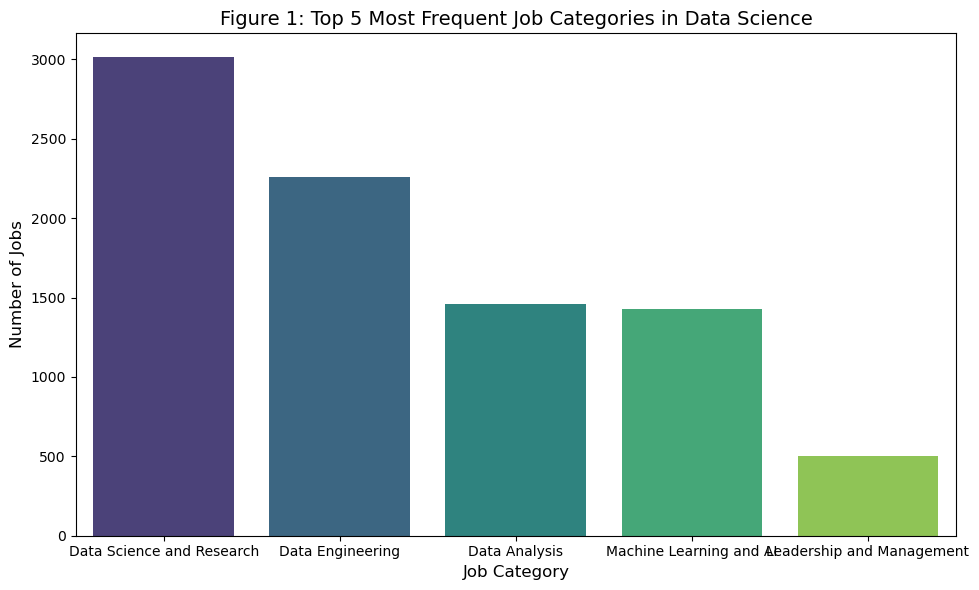

In [3]:
# Counting job categories and printing the amount of employees within the top 5
job_category_count = df['job_category'].value_counts()
print(f'{(job_category_count.head(5).to_markdown())}\n')
# Counting how many are within top 5
top_5_total = job_category_count.head(5).sum()
print(f'Sum of top 5 categories: {top_5_total}')

# Plot 1: Bar chart of top 5 job category counts
plt.figure(figsize=(10, 6))
sns.barplot(
    x=job_category_count.head(5).index, # Job categories for the x-axis
    y=job_category_count.head(5).values, # Counts for the y-axis
    # Adding color to the bars
    hue=job_category_count.head(5).index,
    legend = False,
    palette='viridis'
)
plt.title('Figure 1: Top 5 Most Frequent Job Categories in Data Science', fontsize=14)
plt.xlabel('Job Category', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.tight_layout()


**Proceeding with data filtration:** 8662/9355 employees are within top 5 job categories.

In [4]:
# Finding the top 5 most common job categories and isolating them to a list
top_5_job_categories = df['job_category'].value_counts().nlargest(5).index.tolist()
# Using the list to filter the data to entries that are within the top 5 job categories
df_filtered = df[df['job_category'].isin(top_5_job_categories)]
# Filtered data info
print(f'-- Filtered Data Info --')
print(df_filtered.info())

-- Filtered Data Info --
<class 'pandas.core.frame.DataFrame'>
Index: 8662 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8662 non-null   int64 
 1   job_title           8662 non-null   object
 2   job_category        8662 non-null   object
 3   salary_currency     8662 non-null   object
 4   salary              8662 non-null   int64 
 5   salary_in_usd       8662 non-null   int64 
 6   employee_residence  8662 non-null   object
 7   experience_level    8662 non-null   object
 8   employment_type     8662 non-null   object
 9   work_setting        8662 non-null   object
 10  company_location    8662 non-null   object
 11  company_size        8662 non-null   object
dtypes: int64(3), object(9)
memory usage: 879.7+ KB
None


**Question 1 Analysis**: *How does salary vary across the top 5 most common job categories?*

To answer this question, I will find the mean salary of each job category corresponding to experience (as experience influences salary), and provide a line plot to investigate the trends.

| job_category              |   Entry-level |   Executive |   Mid-level |   Senior |
|:--------------------------|--------------:|------------:|------------:|---------:|
| Data Analysis             |         69962 |      110156 |       96317 |   119799 |
| Data Engineering          |         96348 |      187123 |      115031 |   156002 |
| Data Science and Research |        100976 |      206460 |      129167 |   174375 |
| Leadership and Management |         81012 |      189214 |      115545 |   152032 |
| Machine Learning and AI   |         89076 |      206510 |      141945 |   191544 |



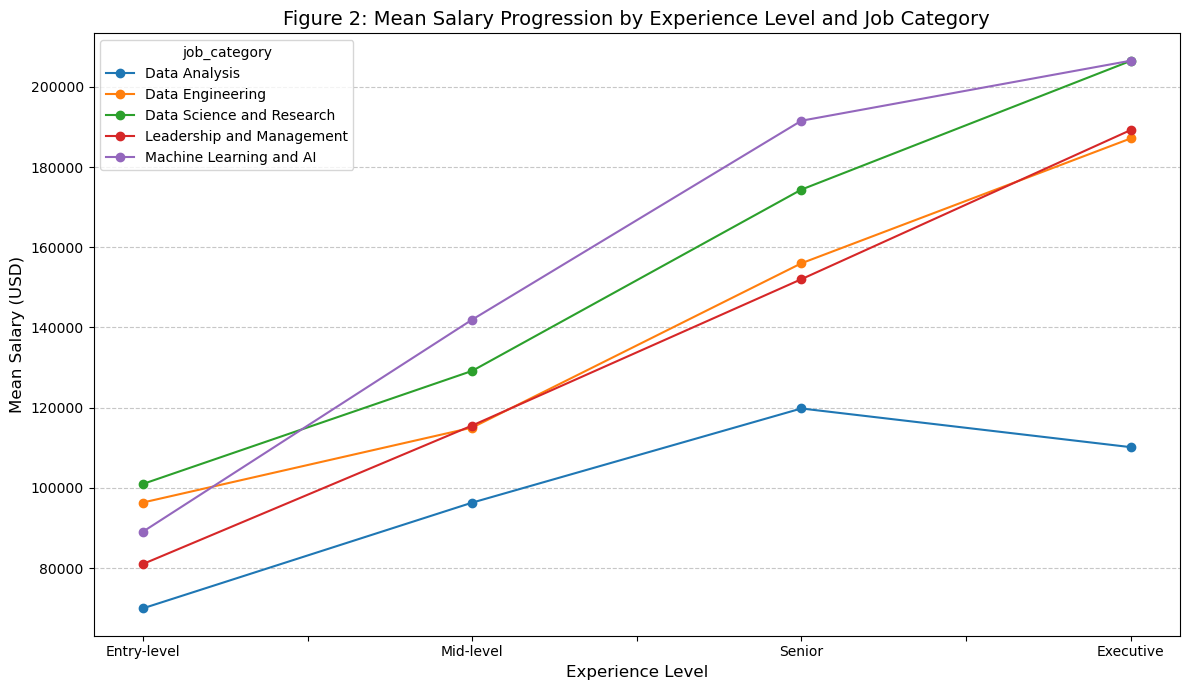

In [5]:
# Finding each mean and rounding to nearest USD (int)
mean_salary = df_filtered.groupby(['job_category', 'experience_level'])['salary_in_usd'].mean().round(0).astype(int)
# Using unstack() to make 'experience level' into a column for better legibility
mean_salary_table = mean_salary.unstack('experience_level', 0)
print(f'{mean_salary_table.to_markdown()}\n')

# Plot 2: Line plot of mean salary by experience
# Exerpience level as x-axis
plot_data = mean_salary_table.transpose()
# Making sure they are plotted in the correct order:
experience_order = ['Entry-level', 'Mid-level', 'Senior', 'Executive']
plot_data = plot_data.reindex(experience_order)
plt.figure(figsize=(12, 7))
plot_data.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Figure 2: Mean Salary Progression by Experience Level and Job Category', fontsize=14)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Mean Salary (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

**Question 1 Discussion:** The table reveals that executive Machine Learning & AI employees have the highest mean salary at $206,510 USD, and entree level Data Anaylsis employees have the lowest mean salary at $69,962 USD. It would seem Machine Learning & AI and Data Science & Research have higher premiums to salary when going up in experience level, which is clear in `Figure 2`. Overall, Machine Learning & AI has the higest average mean salary across all experience levels, aside from entry level, where the means are all similiar to eachother.

**Question 2 Analysis**: *Does experience level significantly influence salary?*

To answer this question, I will calculate the median salary and see how experience level influences a salary to be above or below the median salary. This will be done with logistic regression, looking at the probability of a salary being above the median.

In [6]:
# Calculate median salary and use it to compare
median_salary = df['salary_in_usd'].median()
df['is_high_salary'] = (df['salary_in_usd'] > median_salary).astype(int)

# Making predictor variables, the reference groups will be Experience Entry Level & Company size L, get_dummies converts to number
X_category = pd.get_dummies(df[['experience_level', 'company_size']], drop_first=True)
# Define X and Y and add the predictor variable as an intercept
Y = df['is_high_salary'].astype(float)
X = sm.add_constant(X_category).astype(float)
# Run it on a logisitc regression model 
model = sm.Logit(Y, X)
result = model.fit(disp=False)
print(f'Median Salary: ${median_salary} USD')
print(result.summary().as_text())

Median Salary: $143000.0 USD
                           Logit Regression Results                           
Dep. Variable:         is_high_salary   No. Observations:                 9355
Model:                          Logit   Df Residuals:                     9349
Method:                           MLE   Df Model:                            5
Date:                Sun, 23 Nov 2025   Pseudo R-squ.:                 0.07530
Time:                        16:52:48   Log-Likelihood:                -5996.1
converged:                       True   LL-Null:                       -6484.4
Covariance Type:            nonrobust   LLR p-value:                6.945e-209
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.9441      0.146    -13.279      0.000      -2.231      -1.657
experience_level_Executive     2.7594      0.189     1

**Question 2 Discussion:** The model shows a highly significant influence of experience level on the probability of earning above the median salary of ($143,000 USD). For example, a mid-level employee has a coeffcient of 0.7613, meaning they are 2.14x more likely to have a salary above the median than an entree level employee. The calculations showing odds are below:

In [7]:
coef_mid_level = 0.7613
coef_senior = 2.0396
coef_executive = 2.7594

# Formula is: chance = e^(coef)
mid_level_likliehood_above_median = np.exp(coef_mid_level)
senior_likliehood_above_median = np.exp(coef_senior)
executive_likliehood_above_median = np.exp(coef_executive)

print(f'Mid level chance above median: {mid_level_likliehood_above_median:.2f}x')
print(f'Senior chance above median: {senior_likliehood_above_median:.2f}x')
print(f'Executive chance above median: {executive_likliehood_above_median:.2f}x')

Mid level chance above median: 2.14x
Senior chance above median: 7.69x
Executive chance above median: 15.79x


**Tying the questions together:** Next, to demonstrate both answers, I will create a violin plot of salary distribution, which will visualize specfic distrobutions of salaries between categories and up experience gaps.

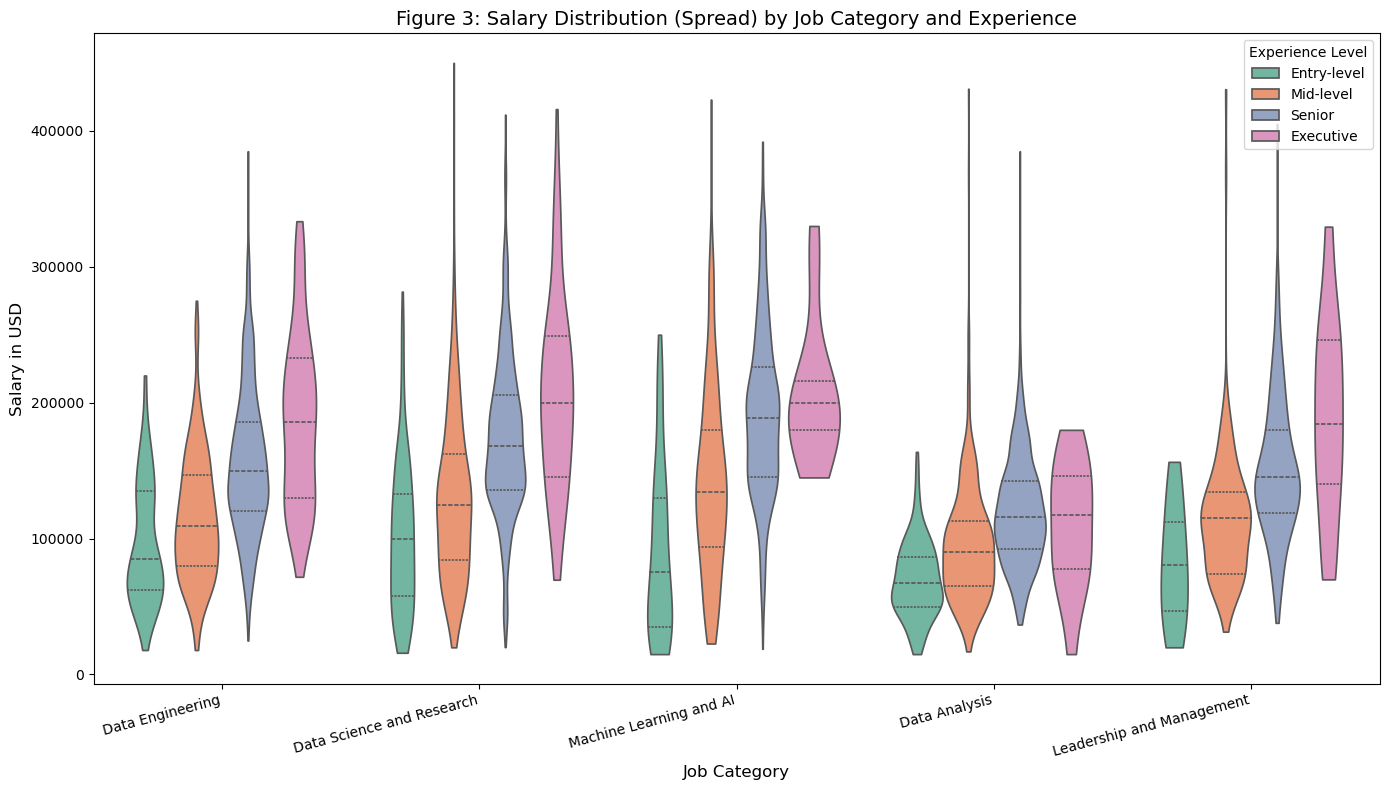

In [8]:
plt.figure(figsize=(14, 8))
sns.violinplot(
    data=df_filtered,
    x='job_category',
    y='salary_in_usd',
    hue='experience_level',
    hue_order=experience_order,
    split=False,
    palette='Set2',
    inner='quartile', # Showing median, Q1, Q3
    cut=0
)
plt.title('Figure 3: Salary Distribution (Spread) by Job Category and Experience', fontsize=14)
plt.xlabel('Job Category', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.legend(title='Experience Level', loc='upper right')
plt.tight_layout()

The above table reinforces earlier answers to the questions, in that mean salary consistently increases with progression in experience level, and that Machine Learning and AI has the most consistent highest compensation, however it is one of the less populated job-categories, which can be seen in the width of each violin. This is likely due to the data being updated as of 2023, and AI is only recently beginning to grow exponentially. 

**Conclusion:**

Overall, this analysis shows a clear salary hierarchy in data science that is shaped by both **job category** and **experience level**. From the initial filtration step, 8,662 out of 9,355 entries fell within the top 5 job categories, meaning the trends identified are representative of most of the dataset.

Across categories, compensation is strongest in **Machine Learning and AI** and **Data Science and Research**, especially at higher seniority levels. The mean-salary progression confirms this pattern: executive Machine Learning and AI roles reach the highest observed mean salary ($206,510 USD), while entry-level Data Analysis roles are lowest ($69,962 USD). This indicates that specialization in advanced modeling and AI-aligned work is currently associated with stronger salary premiums than more general analytical pathways.

The experience effect is also substantial and statistically meaningful. Using logistic regression with a median-salary threshold of $143,000 USD, results show that, relative to entry-level employees, mid-level employees are about **2.14x** more likely to earn above the median, senior employees are about **7.69x** more likely, and executive employees are about **15.79x** more likely. In practical terms, this suggests that compensation growth in data careers is not linear; salary outcomes accelerate notably with seniority.

Finally, the violin-plot distributions support both earlier conclusions by showing upward salary shifts with each experience tier across nearly all categories, while also highlighting spread and overlap in pay bands. Together, these results answer both guiding questions: salary varies meaningfully by job category, and experience level has a significant influence on whether an employee earns above typical market pay. As demand for AI-driven capabilities continues to expand, the strongest compensation growth is likely to remain concentrated in highly specialized and senior roles.

**Data Link**: https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data/data